In [1]:
import pandas as pd
import numpy as np

In [2]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


##  Visualizing the Image Data

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
single_image = x_train[0]

In [6]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
single_image.shape

(28, 28)

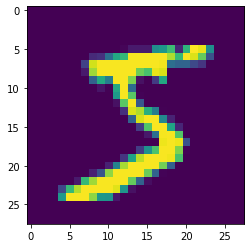

In [8]:
plt.imshow(single_image)

# PreProcessing Data

## Labels

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
y_train.shape

(60000,)

In [13]:
y_example = to_categorical(y_train)

In [14]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [15]:
y_example.shape

(60000, 10)

In [16]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [17]:
y_cat_test = to_categorical(y_test,10)

In [18]:
y_cat_train = to_categorical(y_train,10)

In [19]:
single_image.max()

255

In [20]:
single_image.min()

0

In [21]:
x_train = x_train/255
x_test = x_test/255

In [22]:
scaled_single = x_train[0]

In [23]:
scaled_single.max()

1.0

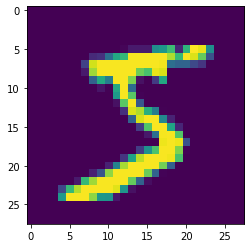

In [24]:
plt.imshow(scaled_single)

## Reshaping the Data

In [25]:
x_train.shape

(60000, 28, 28)

In [26]:
x_test.shape

(10000, 28, 28)

In [27]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [28]:
x_train.shape

(60000, 28, 28, 1)

In [29]:
x_test = x_test.reshape(10000,28,28,1)

In [30]:
x_test.shape

(10000, 28, 28, 1)

# Training the Model

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [32]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [34]:
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [36]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 50s 832us/sample - loss: 0.1378 - accuracy: 0.9585 - val_loss: 0.0647 - val_accuracy: 0.9784
Epoch 2/10
60000/60000 [==============================] - 45s 755us/sample - loss: 0.0481 - accuracy: 0.9849 - val_loss: 0.0417 - val_accuracy: 0.9854
Epoch 3/10
60000/60000 [==============================] - 44s 737us/sample - loss: 0.0316 - accuracy: 0.9899 - val_loss: 0.0383 - val_accuracy: 0.9878
Epoch 4/10
60000/60000 [==============================] - 44s 740us/sample - loss: 0.0210 - accuracy: 0.9933 - val_loss: 0.0366 - val_accuracy: 0.9883
Epoch 5/10
60000/60000 [==============================] - 44s 741us/sample - loss: 0.0156 - accuracy: 0.9949 - val_loss: 0.0387 - val_accuracy: 0.9877
Epoch 6/10
60000/60000 [==============================] - 44s 741us/sample - loss: 0.0116 - accuracy: 0.9965 - val_loss: 0.0506 - val_accuracy: 0.9858


## Evaluate the Model

In [37]:
model.metrics_names

['loss', 'accuracy']

In [38]:
losses = pd.DataFrame(model.history.history)

In [39]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.137825,0.958500,0.064688,0.9784
1,0.048095,0.984933,0.041720,0.9854
2,0.031611,0.989917,0.038303,0.9878
3,0.020977,0.993250,0.036574,0.9883
4,0.015580,0.994917,0.038736,0.9877


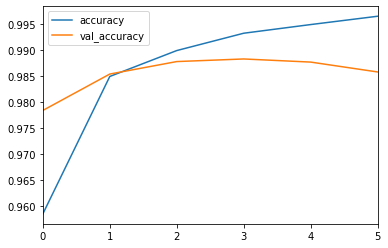

In [40]:
losses[['accuracy','val_accuracy']].plot()

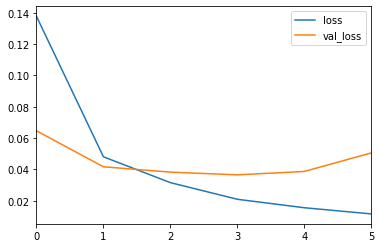

In [41]:
losses[['loss','val_loss']].plot()

In [42]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[0.05056162220043843, 0.9858]


In [43]:
from sklearn.metrics import classification_report,confusion_matrix

In [44]:
predictions = model.predict_classes(x_test)

In [45]:
y_cat_test.shape

(10000, 10)

In [46]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [47]:
predictions[0]

7

In [48]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [49]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.96      0.99      0.98       892
           6       1.00      0.97      0.98       958
           7       0.98      0.99      0.99      1028
           8       1.00      0.97      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [50]:
confusion_matrix(y_test,predictions)

array([[ 979,    0,    0,    0,    0,    0,    0,    1,    0,    0],
       [   0, 1129,    1,    0,    0,    1,    2,    1,    1,    0],
       [   3,    4, 1014,    5,    0,    0,    2,    4,    0,    0],
       [   0,    0,    0, 1002,    0,    6,    0,    2,    0,    0],
       [   0,    0,    0,    0,  977,    0,    0,    0,    0,    5],
       [   1,    0,    0,    3,    0,  887,    0,    0,    0,    1],
       [  13,    1,    0,    0,    3,   14,  927,    0,    0,    0],
       [   1,    1,    4,    4,    0,    0,    0, 1016,    0,    2],
       [   7,    1,    3,    6,    2,    4,    0,    2,  945,    4],
       [   2,    2,    0,    3,    3,   11,    0,    6,    0,  982]],
      dtype=int64)

In [51]:
import seaborn as sns

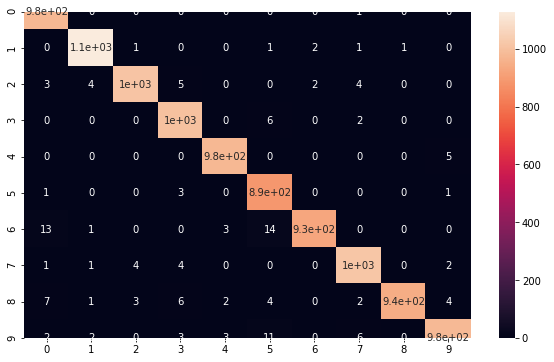

In [53]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

# Predicting a given image

In [54]:
my_number = x_test[0]

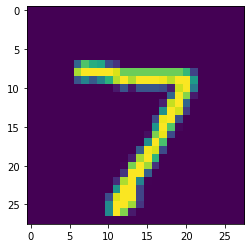

In [55]:
plt.imshow(my_number.reshape(28,28))

In [56]:
model.predict_classes(my_number.reshape(1,28,28,1))

array([7], dtype=int64)